In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib as mpl
# mpl.style.use('ggplot')
mpl.rcParams['axes.labelpad'] = 12

import seaborn as sns
sns.set_theme()

# ensure reproducibility
np.random.seed(123)


In [3]:
pkl_file = './df_sleep.pkl'
df_sleep = pd.read_pickle(pkl_file)
df_sleep.shape

(458, 255)

In [4]:
col_sleep = [
  'BL_ODI_sleeping',
  '3m_ODI_sleeping',
  '12m_ODI_sleeping',
  '24m_ODI_sleeping'
]
bool_impaired_BL = df_sleep['BL_ODI_sleeping'] > 0
bool_normal_BL = df_sleep['BL_ODI_sleeping'] == 0

In [5]:
X = ['Baseline', '3 mo', '12 mo', '24 mo']
Y = []
for col in col_sleep:
  Y.append({
    0: df_sleep[col].value_counts().get(0, 0),
    1: df_sleep[col].value_counts().get(1, 0),
    2: df_sleep[col].value_counts().get(2, 0),
    3: df_sleep[col].value_counts().get(3, 0),
    4: df_sleep[col].value_counts().get(4, 0),
    5: df_sleep[col].value_counts().get(5, 0),
  })
df_sleep_all = pd.DataFrame(Y, index=X)
df_sleep_all.index.name = 'Time period'
df_sleep_all.columns.name = 'ODI Item 7'

Y = []
for col in col_sleep:
  Y.append({
    0: df_sleep[bool_impaired_BL][col].value_counts().get(0, 0),
    1: df_sleep[bool_impaired_BL][col].value_counts().get(1, 0),
    2: df_sleep[bool_impaired_BL][col].value_counts().get(2, 0),
    3: df_sleep[bool_impaired_BL][col].value_counts().get(3, 0),
    4: df_sleep[bool_impaired_BL][col].value_counts().get(4, 0),
    5: df_sleep[bool_impaired_BL][col].value_counts().get(5, 0),
  })
df_sleep_impaired = pd.DataFrame(Y, index=X)
df_sleep_impaired.index.name = 'Time period'
df_sleep_impaired.columns.name = 'ODI Item 7'

Y = []
for col in col_sleep:
  Y.append({
    0: df_sleep[bool_normal_BL][col].value_counts().get(0, 0),
    1: df_sleep[bool_normal_BL][col].value_counts().get(1, 0),
    2: df_sleep[bool_normal_BL][col].value_counts().get(2, 0),
    3: df_sleep[bool_normal_BL][col].value_counts().get(3, 0),
    4: df_sleep[bool_normal_BL][col].value_counts().get(4, 0),
    5: df_sleep[bool_normal_BL][col].value_counts().get(5, 0),
  })
df_sleep_normal = pd.DataFrame(Y, index=X)
df_sleep_normal.index.name = 'Time period'
df_sleep_normal.columns.name = 'ODI Item 7'

print('All Patients')
display(df_sleep_all)
print('Patients with Impairment at Baseline')
display(df_sleep_impaired)
print('Patients with No Impairment at Baseline')
display(df_sleep_normal)

All Patients


ODI Item 7,0,1,2,3,4,5
Time period,,,,,,
Baseline,66,143,109,88,40,11
3 mo,235,133,48,30,12,0
12 mo,244,116,53,31,11,3
24 mo,217,142,54,28,14,3


Patients with Impairment at Baseline


ODI Item 7,0,1,2,3,4,5
Time period,,,,,,
Baseline,0,143,109,88,40,11
3 mo,184,122,47,27,11,0
12 mo,192,108,49,29,10,3
24 mo,167,131,50,27,13,3


Patients with No Impairment at Baseline


ODI Item 7,0,1,2,3,4,5
Time period,,,,,,
Baseline,66,0,0,0,0,0
3 mo,50,11,1,3,1,0
12 mo,51,8,4,2,1,0
24 mo,49,11,4,1,1,0


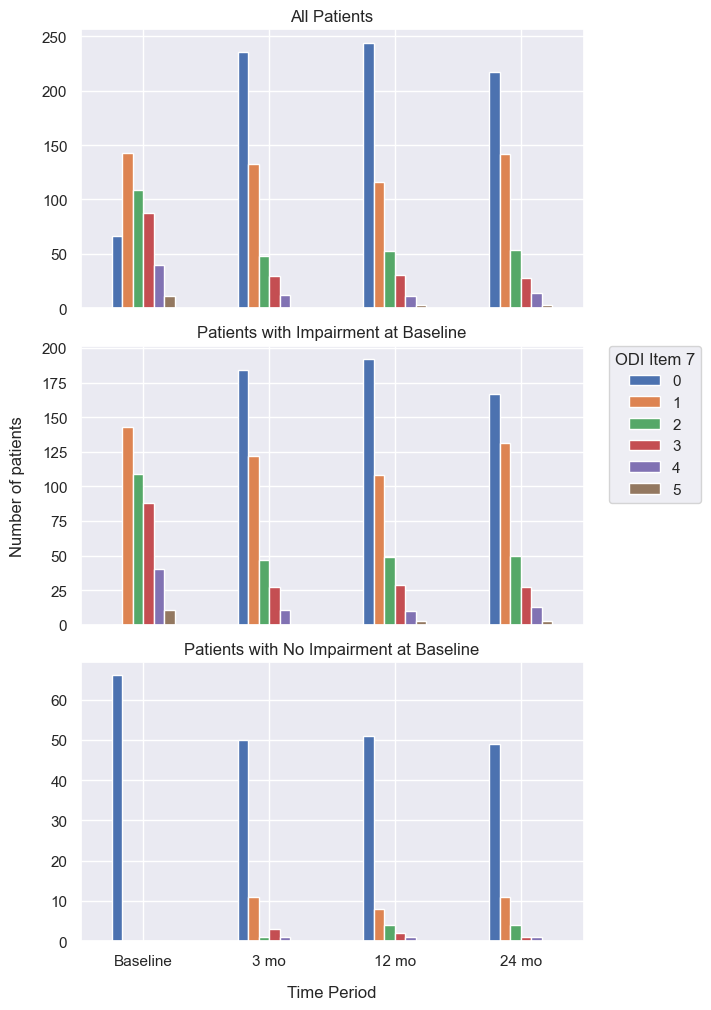

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(7,10), layout='constrained', sharex=True)
df_sleep_all.plot(kind='bar', ax=axs[0])
axs[0].set_title('All Patients')
axs[0].get_legend().remove()

df_sleep_impaired.plot(kind='bar', ax=axs[1])
axs[1].set_title('Patients with Impairment at Baseline')
axs[1].get_legend().remove()

df_sleep_normal.plot(kind='bar', ax=axs[2])
axs[2].set_title('Patients with No Impairment at Baseline')
axs[2].get_legend().remove()

axs[2].set_xlabel('Time Period')
axs[1].set_ylabel('Number of patients')
axs[1].legend(range(6), 
  bbox_to_anchor=(1.05, 1),
  loc='upper left',
  borderaxespad=0,
  title='ODI Item 7',
)
labels = axs[2].get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='center')
fig.savefig('./figures/figure1.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

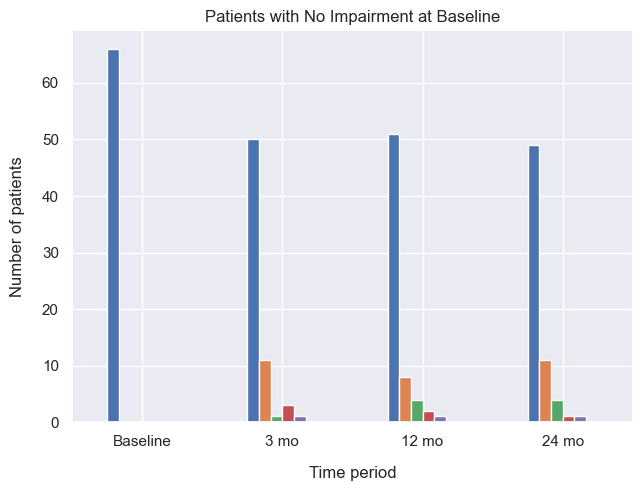

In [18]:
fig, ax = plt.subplots(layout='constrained', )
df_sleep_all.plot(kind='bar', ax=ax)
ax.set_ylabel('Number of patients')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='center')
ax.get_legend().remove()

ax.set_title('All Patients')
fig.savefig('./figures/figure1a.png', dpi=300, transparent=False, bbox_inches='tight')

ax.clear()

df_sleep_impaired.plot(kind='bar', ax=ax)
ax.set_ylabel('Number of patients')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='center')
ax.get_legend().remove()

ax.set_title('Patients with Impairment at Baseline')
fig.savefig('./figures/figure1b.png', dpi=300, transparent=False, bbox_inches='tight')

ax.clear()

df_sleep_normal.plot(kind='bar', ax=ax)
ax.set_ylabel('Number of patients')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='center')
ax.get_legend().remove()

ax.set_title('Patients with No Impairment at Baseline')
fig.savefig('./figures/figure1c.png', dpi=300, transparent=False, bbox_inches='tight')

# axs[2].set_xlabel('Time Period')
# axs[1].set_ylabel('Number of patients')
# axs[1].legend(range(6), 
#   bbox_to_anchor=(1.05, 1),
#   loc='upper left',
#   borderaxespad=0,
#   title='ODI Item 7',
# )
# 
# fig.savefig('./figures/figure1.png', dpi=80, transparent=False, bbox_inches='tight')
# plt.show()

In [ ]:
from pandas.api.types import CategoricalDtype

df_sleep[col_sleep] = df_sleep[col_sleep].round().astype('Int64').astype(CategoricalDtype(ordered=True)).fillna(0)

In [ ]:
df_sleep_all = pd.DataFrame({
  'Baseline ODI Item 7': df_sleep['BL_ODI_sleeping'].value_counts(),
  '3 mo ODI Item 7': df_sleep['3m_ODI_sleeping'].value_counts(),
  '12 mo ODI Item 7': df_sleep['12m_ODI_sleeping'].value_counts(),
  '24 mo ODI Item 7': df_sleep['24m_ODI_sleeping'].value_counts()
})
df_sleep_impaired = pd.DataFrame({
  'BL_ODI_sleeping': df_sleep[bool_impaired_BL]['BL_ODI_sleeping'].value_counts(),
  '3m_ODI_sleeping': df_sleep[bool_impaired_BL]['3m_ODI_sleeping'].value_counts(),
  '12m_ODI_sleeping': df_sleep[bool_impaired_BL]['12m_ODI_sleeping'].value_counts(),
  '24m_ODI_sleeping': df_sleep[bool_impaired_BL]['24m_ODI_sleeping'].value_counts()
})
df_sleep_normal = pd.DataFrame({
  'BL_ODI_sleeping': df_sleep[bool_normal_BL]['BL_ODI_sleeping'].value_counts(),
  '3m_ODI_sleeping': df_sleep[bool_normal_BL]['3m_ODI_sleeping'].value_counts(),
  '12m_ODI_sleeping': df_sleep[bool_normal_BL]['12m_ODI_sleeping'].value_counts(),
  '24m_ODI_sleeping': df_sleep[bool_normal_BL]['24m_ODI_sleeping'].value_counts()
})

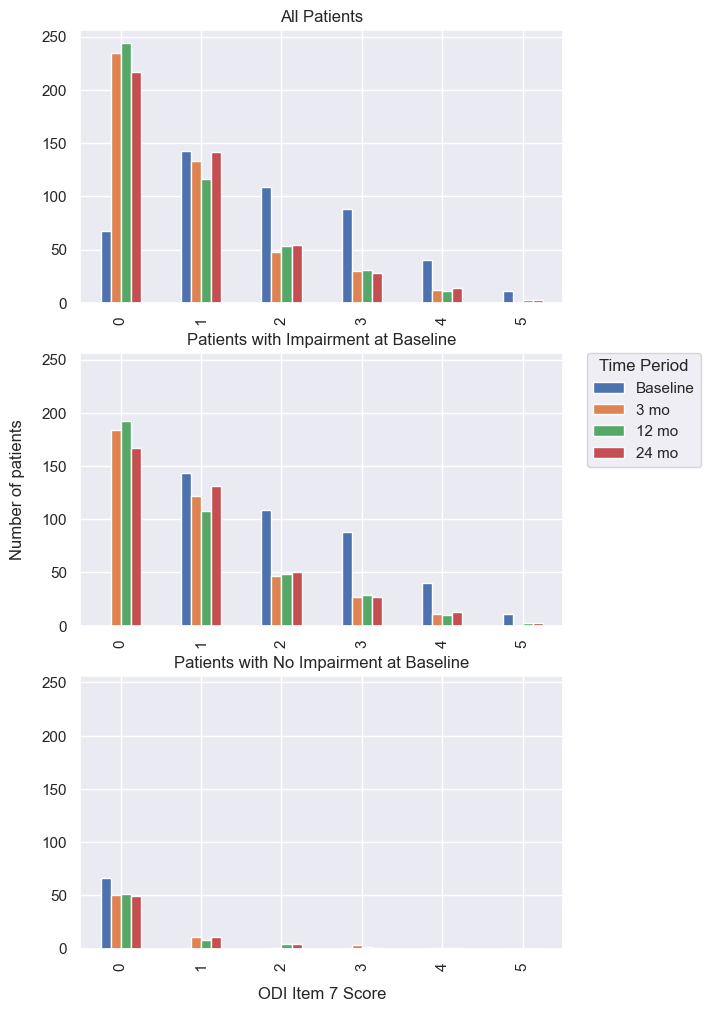

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(7,10), layout='constrained', sharey=True)
df_sleep_all.plot(kind='bar', ax=axs[0])
axs[0].set_title('All Patients')
axs[0].get_legend().remove()

df_sleep_impaired.plot(kind='bar', ax=axs[1])
axs[1].set_title('Patients with Impairment at Baseline')
axs[1].get_legend().remove()

df_sleep_normal.plot(kind='bar', ax=axs[2])
axs[2].set_title('Patients with No Impairment at Baseline')
axs[2].get_legend().remove()

axs[2].set_xlabel('ODI Item 7 Score')
axs[1].set_ylabel('Number of patients')
axs[1].legend(['Baseline', '3 mo', '12 mo', '24 mo'], 
  bbox_to_anchor=(1.05, 1),
  loc='upper left',
  borderaxespad=0,
  title='Time Period',
)
fig.savefig('./figures/figure1_alt.png', dpi=80, transparent=False, bbox_inches='tight')
plt.show()